In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
plt.figure(figsize=[10,10])

<Figure size 1000x1000 with 0 Axes>

In [2]:
org_data = pd.read_excel('Data_Train (1).xlsx')

In [3]:
data = org_data.copy()
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# Total no of cars for sales by location

In [4]:
location = data.groupby('Location').size().sort_values()

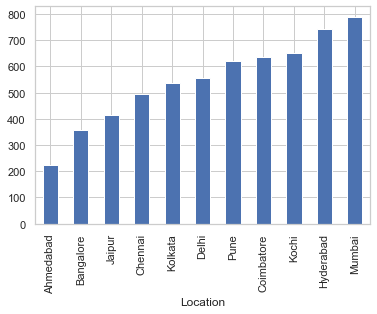

In [5]:
location.plot(kind = 'bar')
plt.grid(True)

In [6]:
location = pd.DataFrame(location)
location = location.sort_values(by = 0,ascending = True)
location = location.rename(columns= {0:'Count'})
location

,Count
Location,
Ahmedabad,224
Bangalore,358
Jaipur,413
Chennai,494
Kolkata,535
Delhi,554
Pune,622
Coimbatore,636
Kochi,651


In [7]:
location.sum()# total no of cars

Count    6019
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

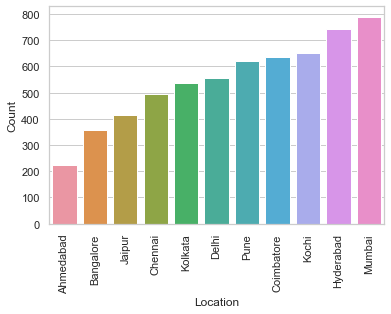

In [36]:
sns.barplot(location.index,location['Count'])#using Seabron
plt.xticks(rotation=90)
#plt.grid()

Location wise Mumbai has the highest car's for sale 

# Identifying  which company's are 

In [9]:
data['Manufacturers'] = data['Name'].str.split().str.get(0)

In [10]:
Manufacturers = data.groupby('Manufacturers').size().sort_values(ascending = False)
Manufacturers =pd.DataFrame(Manufacturers)
Manufacturers = Manufacturers.rename(columns = {0:'Count'})

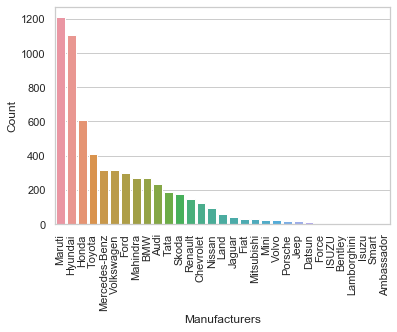

In [11]:
sns.barplot(Manufacturers.index,Manufacturers['Count'])
plt.xticks(rotation = 90)
#plt.rcParams['figure.figsize'] = [15,10]
#plt.grid()
sns.set(style = 'whitegrid')

# Finding the total no of differnet type of fule engines which where kept for sale 

In [33]:
fule_type = data.groupby(['Fuel_Type']).size().sort_values(ascending=False)#.reset_index()
fule_type

Fuel_Type
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
dtype: int64

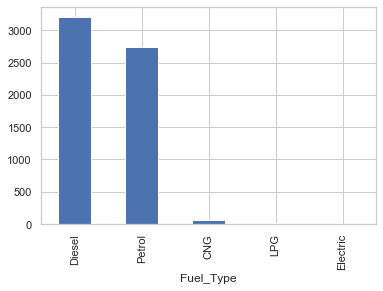

In [35]:
fule_type.plot(kind='bar')

In [14]:
top_sold_cars = data.groupby('Name')['Year'].size().sort_values(ascending =False).reset_index()
top = pd.DataFrame(top_sold_cars).head(10)
top = top.rename(columns = {'Year': 'Count'})
top

,Name,Count
0,Mahindra XUV500 W8 2WD,49
1,Maruti Swift VDI,45
2,Honda City 1.5 S MT,34
3,Maruti Swift Dzire VDI,34
4,Maruti Swift VDI BSIV,31
5,Maruti Ritz VDi,30
6,Hyundai i10 Sportz,30
7,Toyota Fortuner 3.0 Diesel,29
8,Honda Amaze S i-Dtech,27
9,Hyundai Grand i10 Sportz,27


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

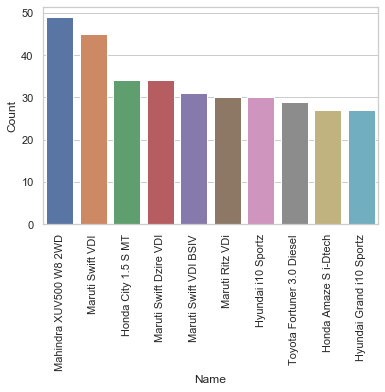

In [15]:
sns.barplot(top['Name'],top['Count'])
plt.xticks(rotation = 90)
#plt.figure(figsize=[0,0])

most of the vehicles for sale are Mahindra XUV500 W8 2WD and the count is 49

# Identifying the Mileage Distributions 

In [49]:
data['Mileage'] = data['Mileage'].fillna('0 kmpl')

In [56]:
data['Mileage_num']= data['Mileage'].apply(lambda x: float(x.split()[0]))

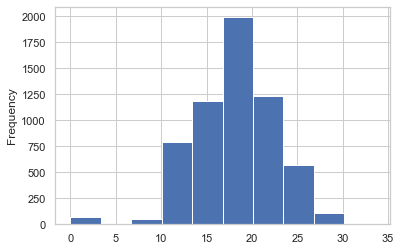

In [57]:
data['Mileage_num'].plot(kind = 'hist')

Most of the vehicles mileage is between 15 to 25 kmph